# Task 3 - Bifurcations in higher dimensions

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.integrate import solve_ivp

from utils import * 

%load_ext autoreload
%autoreload 2

The **Andronov-Hopf bifurcation** is described with the vector field in normal form

$$
\dot{x}_1 = \alpha x_1 - x_2 - x_1 (x_1^2 + x_2^2)
$$

$$
\dot{x}_2 = x_1 - \alpha x_2 - x_2 (x_1^2 + x_2^2)
$$

Let's plot different phase diagrams at representative values of $\alpha$ in order to visualize the bifurcation of the system:

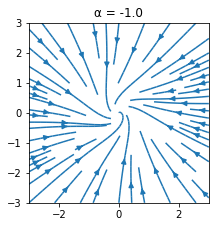

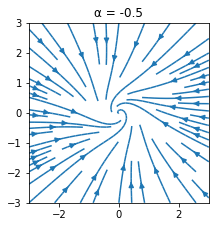

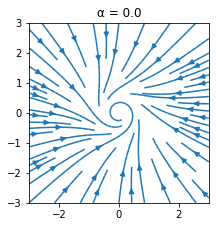

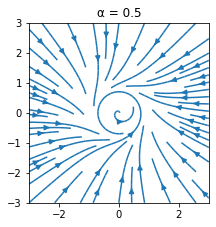

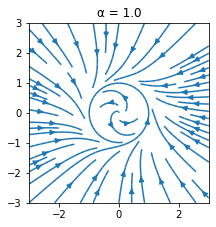

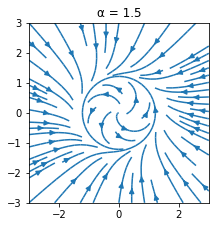

In [2]:
w = 3
x2, x1 = np.mgrid[-w:w:100j, -w:w:100j]

for alpha in np.arange(-1, 2, 0.5):
    x_1_dot = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    x_2_dot = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    
    ax0 = plot_phase_portrait(x1, x2, x_1_dot, x_2_dot)
    ax0.set_title("α = " + str(alpha))

For $\alpha = 1$, let's compute and visualize two orbits of the system forward in time, starting at (2, 0) and (0.5, 0)

In [3]:
alpha = 1

In [4]:
def system(t, y): # Right-hand side of the system
    x1, x2 = y
    
    x_1_dot = alpha * x1 - x2 - x1*(np.square(x1) + np.square(x2))
    x_2_dot = x1 + alpha * x2 - x2*(np.square(x1) + np.square(x2))
    
    return x_1_dot, x_2_dot

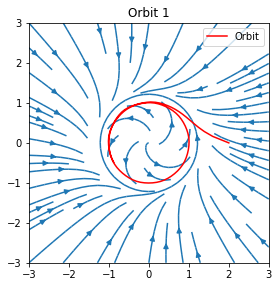

In [5]:
y0 = np.array([2.0, 0])
time = np.linspace(0, 10, 100)
yt, time = solve_ivp(fun = system, 
                     t_span = (0, 10), 
                     y0 = y0, 
                     t_eval = time).y

ax0 = plot_phase_portrait(x1, x2, x_1_dot, x_2_dot, figsize = (20, 20))

ax0.plot(yt, time, c='red', label='Orbit')

ax0.set_title("Orbit 1")

ax0.legend()
ax0.set_aspect(1)

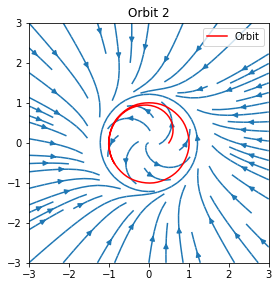

In [6]:
y0 = np.array([0.5, 0])
time = np.linspace(0, 10, 100)
yt, time = solve_ivp(fun = system, 
                     t_span = (0, 10), 
                     y0 = y0, 
                     t_eval = time).y

ax0 = plot_phase_portrait(x1, x2, x_1_dot, x_2_dot, figsize = (20, 20))

ax0.plot(yt, time, c='red', label='Orbit')

ax0.set_title("Orbit 2")

ax0.legend()
ax0.set_aspect(1)

Now, let's analyze the **cusp bifurcation**, which has the normal form

$$
\dot{x} = \alpha_1 + \alpha_2 * x - x^3
$$

In [7]:
def f_alpha1(x, alpha2):
    return -alpha2 * x + x**3

Text(0.5, 0, 'x')

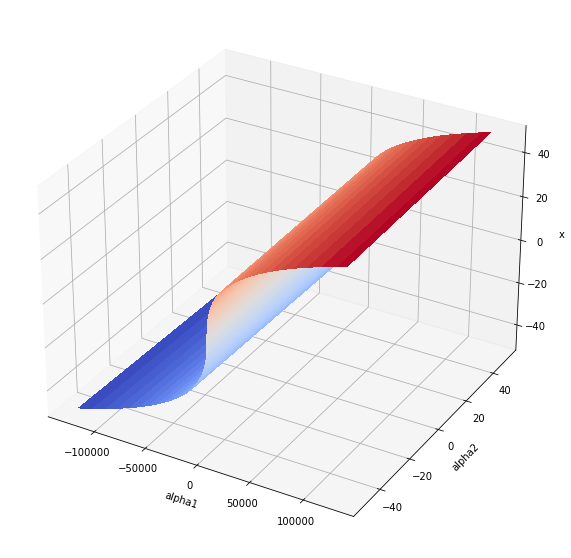

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

limit = 50
x = np.linspace(-limit, limit, 100)
alpha2 = np.linspace(-limit, limit, 100)

x, alpha2 = np.meshgrid(x, alpha2)

alpha1 = f_alpha1(x, alpha2)

ax.plot_surface(alpha1, alpha2, x, cmap=cm.coolwarm, antialiased=False)

ax.set_xlabel('alpha1')
ax.set_ylabel('alpha2')
ax.set_zlabel('x') 